In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/UAS-NLP-Kelompok-7-Chatbot/diabetes_data.csv')
file_path= pd.read_csv('./drive/MyDrive/UAS-NLP-Kelompok-7-Chatbot/diabetes_questions_answers (1).csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


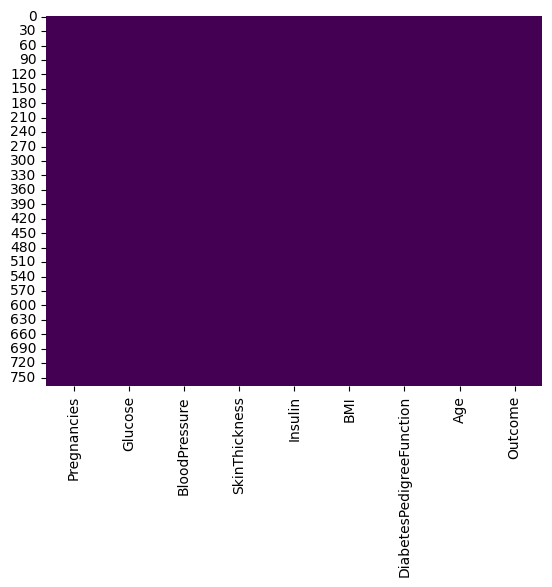

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

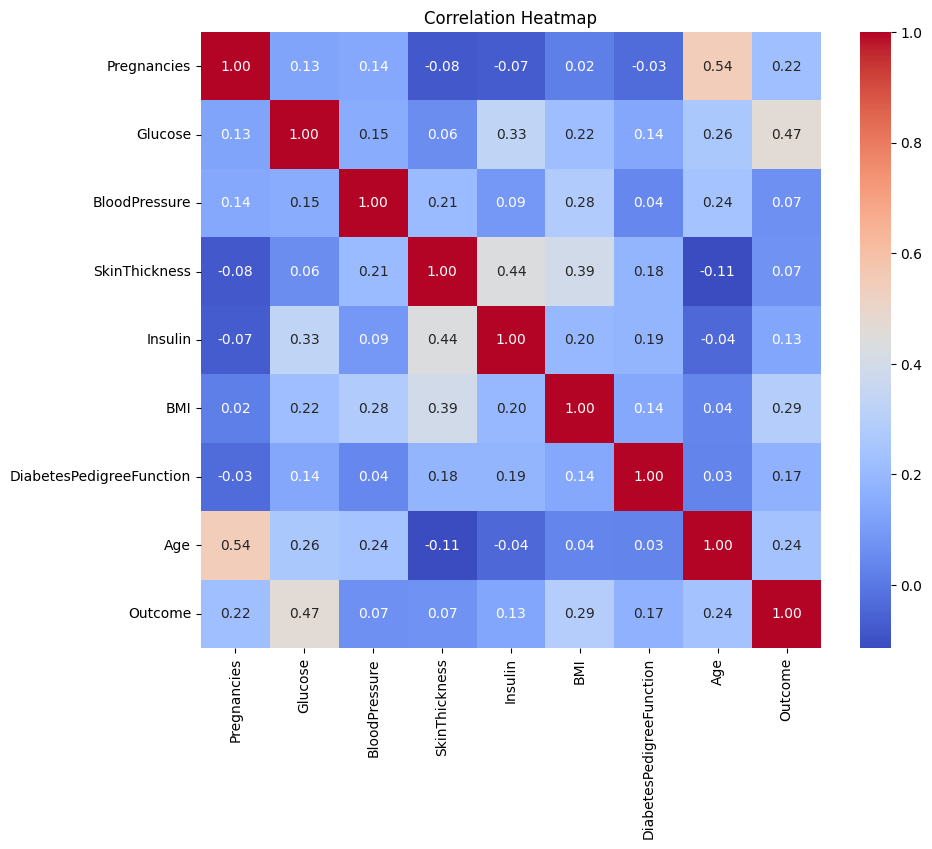

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-7-f93d591d5a05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


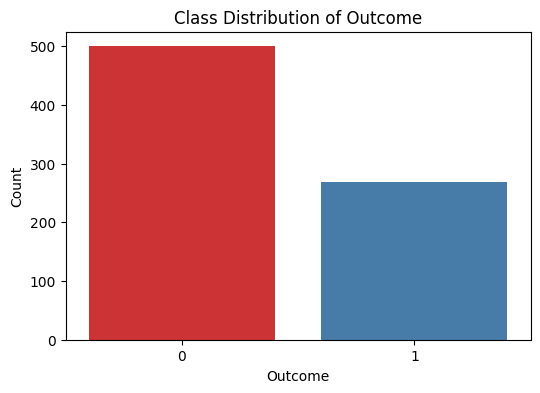

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Check the size of training and testing data
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (576, 8)
Testing data size: (192, 8)


In [ ]:
# Check the shape of target variable splits
print("Training data shape:", y_train.shape)
print("Testing data shape:", y_test.shape)

Training data shape: (576,)
Testing data shape: (192,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Initialize the Logistic Regression model with max_iter to handle convergence
model = LogisticRegression(max_iter=500)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on scaled data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Make predictions on the training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics on the training data
accuracy_train = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

In [ ]:
print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_test}")
print(f"testing Recall: {recall_test}")
print(f"testing F1 Score: {f1_test}")
print(f"testing Confusion Matrix:\n{confusion_matrix_test}")

Training Accuracy: 0.7291666666666666
Training Precision: 0.6164383561643836
testing Recall: 0.6521739130434783
testing F1 Score: 0.6338028169014085
testing Confusion Matrix:
[[95 28]
 [24 45]]


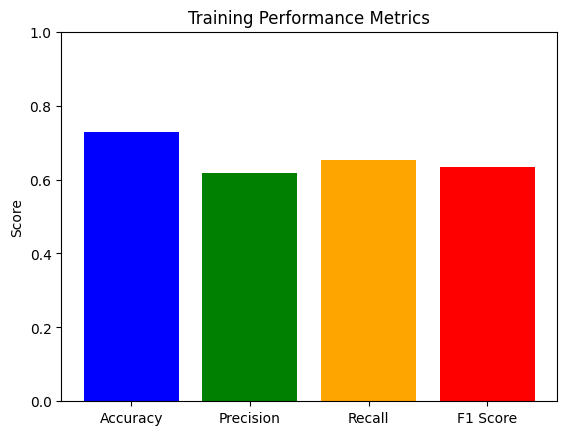

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_train, precision_test, recall_test, f1_test]
# Bar plot for the metrics
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Training Performance Metrics')
plt.ylabel('Score')             # Label the y-axis as 'Score'
plt.ylim([0, 1])                # Set the y-axis limits from 0 to 1 (since scores are between 0 and 1)
plt.show()

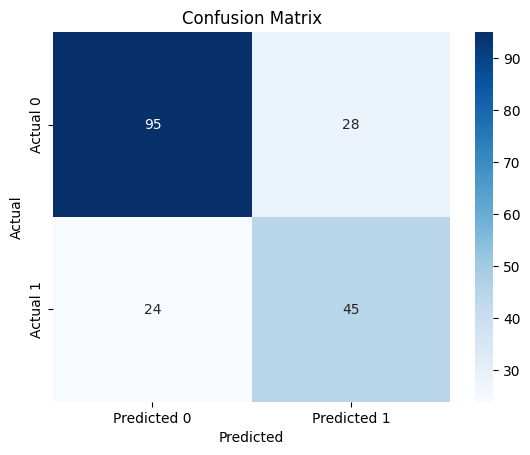

In [ ]:
# Heatmap for the confusion matrix
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Create a heatmap for the confusion matrix with labels for the axes, and integer format for annotations
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred_binary)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_binary)
# Print the performance metrics for the test data
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")
print(f"Test Confusion Matrix:\n{confusion_matrix_test}")

Test Accuracy: 0.7291666666666666
Test Precision: 0.6164383561643836
Test Recall: 0.6521739130434783
Test F1 Score: 0.6338028169014085
Test Confusion Matrix:
[[95 28]
 [24 45]]


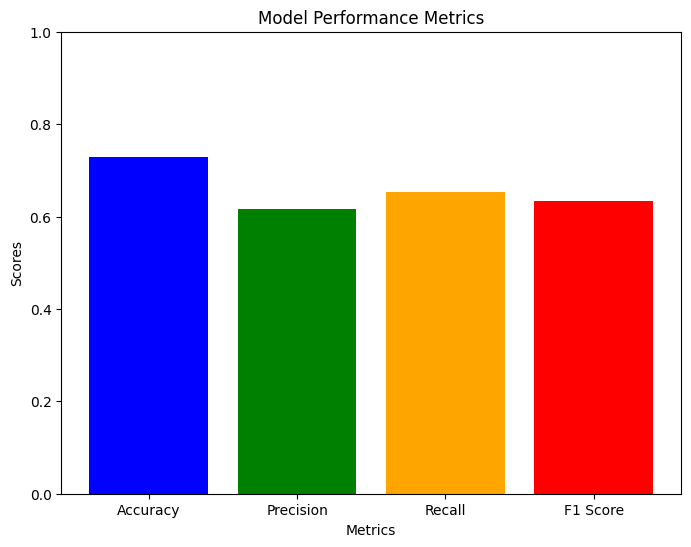

In [ ]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_test, precision_test, recall_test, f1_test]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.show()

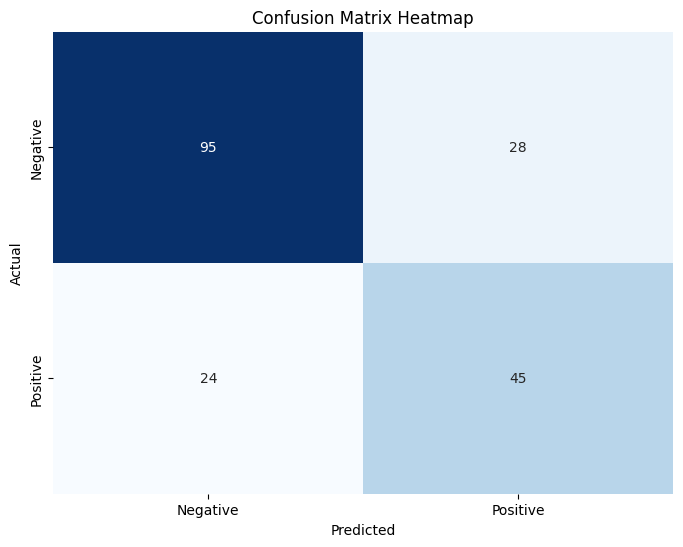

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib
from google.colab import files
filename = 'diabetes_model.sav'
joblib.dump(model, filename)
files.download(filename)

filename = 'scaler.pkl'
joblib.dump(scaler, filename)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cosine Similarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Membaca dataset dari file
from google.colab import drive
drive.mount('/content/drive')
file_path= './drive/MyDrive/UAS-NLP-Kelompok-7-Chatbot/diabetes_qa_dataset2.csv'
df = pd.read_csv(file_path)  # Baca dataset ke dalam DataFrame

# Pastikan dataset memiliki kolom 'Pertanyaan' dan 'Jawaban'
if 'Pertanyaan' not in df.columns or 'Jawaban' not in df.columns:
    raise ValueError("Dataset harus memiliki kolom 'Pertanyaan' dan 'Jawaban'.")

# Inisialisasi TF-IDF Vectorizer dan menghitung vektor untuk pertanyaan
vectorizer = TfidfVectorizer()
question_vectors = vectorizer.fit_transform(df['Pertanyaan'])

# Fungsi untuk menghasilkan respons chatbot
def chatbot_response(user_input):
    # Transformasikan input pengguna menjadi vektor
    user_vector = vectorizer.transform([user_input])

    # Hitung cosine similarity antara input dan semua pertanyaan
    similarity = cosine_similarity(user_vector, question_vectors)

    # Ambil indeks pertanyaan dengan kesamaan tertinggi
    best_match_index = similarity.argmax()
    best_match_score = similarity[0, best_match_index]

    # Cek apakah kesamaan melebihi ambang batas (threshold)
    if best_match_score > 0.5:  # Ambang batas cosine similarity
        return df.iloc[best_match_index]['Jawaban']
    else:
        return "Maaf, saya tidak mengerti pertanyaan Anda. Silakan coba lagi."

# Interaksi dengan chatbot
print("Chatbot siap! Ketik 'quit' untuk keluar.")
while True:
    user_input = input("Anda: ")
    if user_input.lower() == 'quit':
        print("Chatbot: Sampai jumpa!")
        break
    response = chatbot_response(user_input)
    print(f"Chatbot: {response}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Chatbot siap! Ketik 'quit' untuk keluar.
Chatbot: Tidur siang yang terlalu lama dapat mempengaruhi kadar gula darah dan pola tidur malam. Tidur siang sebaiknya tidak lebih dari 30 menit."


KeyboardInterrupt: Interrupted by user